# Data Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
!pip install faker

In [ ]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker
fake = Faker()

# Generate Loan Data
def generate_loan_data_with_faker(num_customers):
    data = {
        "customer_id": [f"C{i+1}" for i in range(num_customers)],
        "age": [random.randint(18, 70) for _ in range(num_customers)],
        "income": [random.randint(15000, 200000) for _ in range(num_customers)],
        "credit_score": [random.randint(300, 900) for _ in range(num_customers)],
        "loan_amount": [random.randint(5000, 100000) for _ in range(num_customers)],
        "interest_rate": [round(random.uniform(3.50, 6.25), 2) for _ in range(num_customers)],
        "loan_term": [random.choice([12, 24, 36, 48, 60]) for _ in range(num_customers)],
    }
    df = pd.DataFrame(data)
    df["repayment_status"] = df.apply(
        lambda x: 1 if x["credit_score"] < 700 or x["income"] < 75000 else 0,
        axis=1,
    )
    return df

# Generate Transaction Data
def generate_transaction_data_with_faker(num_transactions, num_customers):
    data = {
        "customer_id": [f"C{random.randint(1, num_customers)}" for _ in range(num_transactions)],
        "transaction_id": [fake.uuid4() for _ in range(num_transactions)],
        "transaction_amount": [round(random.uniform(10, 5000), 2) for _ in range(num_transactions)],
        "transaction_type": [random.choice(["deposit","withdrawal","Purchases","Credit Transaction","Cash Transaction",]) for _ in range(num_transactions)],
        "transaction_date": [fake.date_between(start_date="-1y", end_date="today") for _ in range(num_transactions)],
    }
    return pd.DataFrame(data)



# Generate Recommendation Data
def generate_recommendation_data_with_faker(num_interactions, num_customers):
    interaction_types = ["viewed", "clicked", "purchased"]

    viewed_options = [
        "Balance", "Transaction History", "Loan Balance", "EMI Schedule", "Fixed Deposit Details",
        "Portfolio", "Policy Details", "Bill Payment History", "Exchange Rates", "Spending Analysis"
    ]

    clicked_options = [
        "Account Details", "Statement Download", "Apply for a Loan", "EMI Calculator", "Open Fixed Deposit",
        "Mutual Fund Details", "Renew Policy", "Pay Bills", "Transfer Funds", "Set Goals"
    ]

    purchased_options = [
        "Savings Account", "Fixed Deposit", "Personal Loan", "Home Loan", "Credit Card",
        "Mutual Funds", "Life Insurance", "Health Insurance", "Forex Card", "Recurring Deposit"
    ]

    data = {
        "customer_id": [f"C{random.randint(1, num_customers)}" for _ in range(num_interactions)],
        "product_id": [fake.uuid4() for _ in range(num_interactions)],
        "interaction_type": [random.choice(interaction_types) for _ in range(num_interactions)],
        "interaction_date": [fake.date_between(start_date="-1y", end_date="today") for _ in range(num_interactions)],
    }

    interaction_details = []
    for interaction in data["interaction_type"]:
        if interaction == "viewed":
            interaction_details.append(random.choice(viewed_options))
        elif interaction == "clicked":
            interaction_details.append(random.choice(clicked_options))
        elif interaction == "purchased":
            interaction_details.append(random.choice(purchased_options))

    data["interaction_details"] = interaction_details
    return pd.DataFrame(data)


# Create datasets
num_customers = 1000
num_transactions = 6000
num_interactions = 10000

loan_data = generate_loan_data_with_faker(num_customers)
transaction_data = generate_transaction_data_with_faker(num_transactions, num_customers)
recommendation_data = generate_recommendation_data_with_faker(num_interactions, num_customers)


In [ ]:
print(loan_data.shape)
print(transaction_data.shape)
print(recommendation_data.shape)

(1000, 8)
(6000, 5)
(10000, 5)


# 1) Loan Data

In [ ]:
#loan_data.to_csv('loan_data.csv', index=False)

In [ ]:
loan_data = pd.read_csv('loan_data.csv')

In [ ]:
# Train-Test Split with Stratification
X = loan_data.drop(["customer_id", "repayment_status"], axis=1)  # Features
y = loan_data["repayment_status"]  # Target

In [ ]:
y.value_counts()

repayment_status
1    754
0    246
Name: count, dtype: int64

In [ ]:
loan_data

customer_id  age  income  credit_score  loan_amount  interest_rate  \
0            C1   67   85850           662        10718           5.65   
1            C2   34  151025           549        79598           4.17   
2            C3   68   82955           475        79739           3.76   
3            C4   63   18826           577        65013           4.27   
4            C5   24  163541           457        63518           6.10   
..          ...  ...     ...           ...          ...            ...   
995        C996   35   20950           814        11996           4.71   
996        C997   39  191116           457        95804           5.76   
997        C998   61   29371           890        71923           3.92   
998        C999   51  168144           857        74024           5.40   
999       C1000   62  136632           386        10702           6.19   

     loan_term  repayment_status  
0           36                 1  
1           60                 1  
2           60                 1  
3           12                 1  
4           48                 1  
..         ...               ...  
995         12                 1  
996         60                 1  
997         36                 1  
998         12                 0  
999         60                 1  

[1000 rows x 8 columns]

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1000 non-null   object 
 1   age               1000 non-null   int64  
 2   income            1000 non-null   int64  
 3   credit_score      1000 non-null   int64  
 4   loan_amount       1000 non-null   int64  
 5   interest_rate     1000 non-null   float64
 6   loan_term         1000 non-null   int64  
 7   repayment_status  1000 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 62.6+ KB


In [ ]:
loan_data.describe()

age         income  credit_score   loan_amount  interest_rate  \
count  1000.000000    1000.000000   1000.000000   1000.000000    1000.000000   
mean     44.222000  109432.420000    601.896000  52225.726000       4.845740   
std      15.394145   52421.534482    174.194515  27691.081334       0.793648   
min      18.000000   15063.000000    300.000000   5203.000000       3.510000   
25%      31.000000   64230.500000    453.000000  27344.750000       4.150000   
50%      44.000000  109885.000000    600.000000  53076.500000       4.810000   
75%      58.000000  155024.750000    753.250000  76116.750000       5.532500   
max      70.000000  199700.000000    900.000000  99903.000000       6.250000   

         loan_term  repayment_status  
count  1000.000000       1000.000000  
mean     35.988000          0.754000  
std      17.261107          0.430894  
min      12.000000          0.000000  
25%      24.000000          1.000000  
50%      36.000000          1.000000  
75%      48.000000          1.000000  
max      60.000000          1.000000

In [ ]:
loan_data.isnull().sum()

customer_id         0
age                 0
income              0
credit_score        0
loan_amount         0
interest_rate       0
loan_term           0
repayment_status    0
dtype: int64

In [ ]:
loan_data.duplicated().sum()

0

## Visualization for Loan Data Transaction


repayment_status
1    754
0    246
Name: count, dtype: int64


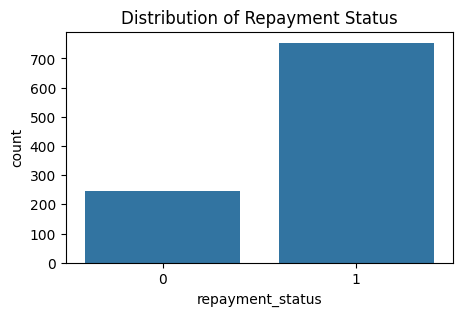

In [ ]:
# Count Plot for Repayment Status
import matplotlib.pyplot as plt
import seaborn as sns


print(y.value_counts())
plt.figure(figsize=(5,3))
sns.countplot(data=loan_data, x='repayment_status')
plt.title("Distribution of Repayment Status")
plt.show()


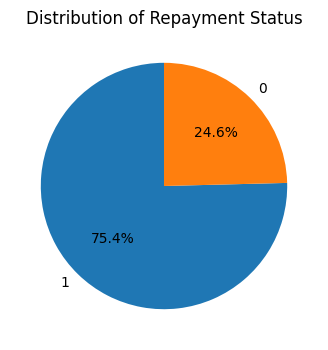

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts for repayment status
repayment_counts = loan_data['repayment_status'].value_counts()

# Extract values and labels for the pie chart
values = repayment_counts.values
labels = repayment_counts.index

# Create the pie chart using matplotlib.pyplot.pie
plt.figure(figsize=(5, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Repayment Status")
plt.show()

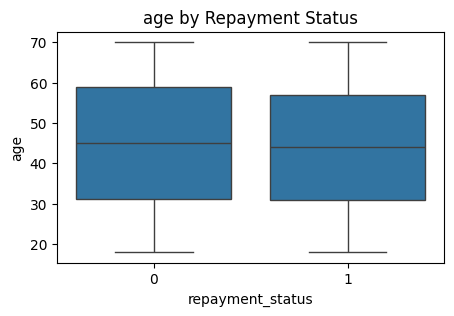

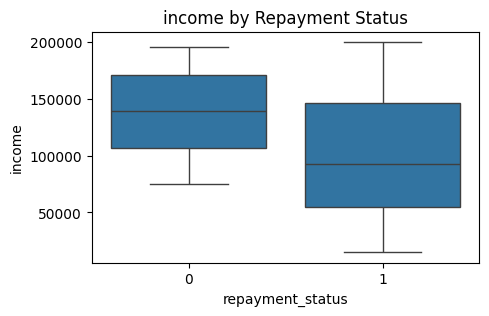

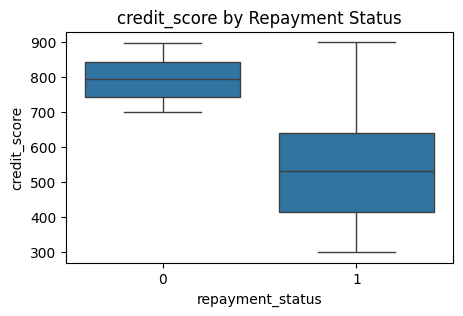

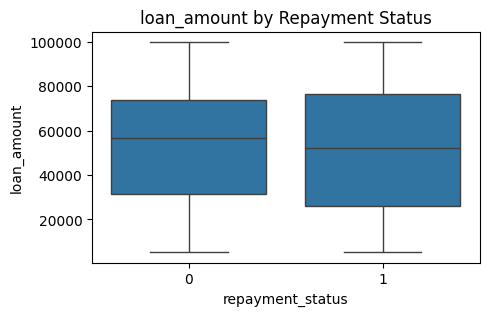

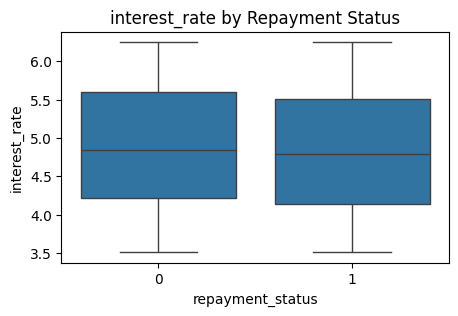

In [ ]:
for col in ['age', 'income', 'credit_score', 'loan_amount', 'interest_rate']:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=loan_data, x='repayment_status', y=col)
    plt.title(f"{col} by Repayment Status")
    plt.show()


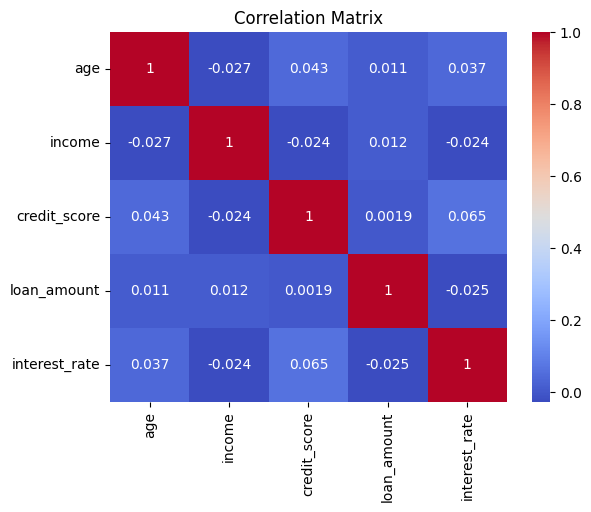

In [ ]:
corr = loan_data[['age', 'income', 'credit_score', 'loan_amount', 'interest_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Supervised Learning for loan_data


---


* Splitting Features and Target
* Scaling
* Train Test Split
* Imbalanced to Balance using Smote
* Algorithms
  1.   Logistic Regression Algorithm
  2.   Random Forest Classifier Algorithm
  3.   XgBoosting Algorithm


---










In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42, k_neighbors=5)
X_train__scalar_smote, y_train_scalar_smote = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train__scalar_smote)
X_test_smote_scaled = scaler.transform(X_test)

In [ ]:
X_train_smote_scaled

array([[ 0.59370757, -0.1311758 , -1.44738383, -0.92545799,  1.88857306,
        -1.49205779],
       [-0.78018631, -0.45668261, -0.58764834,  1.75197963,  0.41398442,
        -0.04041269],
       [ 0.73109696, -0.96781678, -1.62993041, -0.84017104,  1.3306206 ,
        -1.49205779],
       ...,
       [-0.71149162,  1.17193919,  0.91394448,  0.24353487, -0.37717583,
         0.02007253],
       [ 0.73109696,  0.81426031,  0.47818814,  0.96295279,  0.40733652,
        -0.76623524],
       [-1.26104917,  1.24220314,  0.22497837,  1.04541318, -0.75147429,
        -0.04041269]])

In [ ]:
y_train_scalar_smote.value_counts()

repayment_status
1    452
0    452
Name: count, dtype: int64

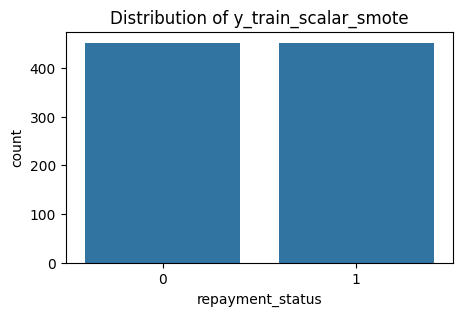

In [ ]:
# prompt: y_train_scalar_smote visualize it

# Visualize y_train_scalar_smote
plt.figure(figsize=(5, 3))
sns.countplot(x=y_train_scalar_smote)
plt.title("Distribution of y_train_scalar_smote")
plt.show()

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_smote_scaled, y_train_scalar_smote)

y_pred_train_lr_scaled_smote = logisticRegr.predict(X_train_smote_scaled)
y_pred_test_lr_scaled_smote = logisticRegr.predict(X_test_smote_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Train Data")
print('accuracy: {:.2f}'.format(accuracy_score(y_train_scalar_smote, y_pred_train_lr_scaled_smote)))
print('precision: {:.2f}'.format(precision_score(y_train_scalar_smote, y_pred_train_lr_scaled_smote)))
print('recall: {:.2f}'.format(recall_score(y_train_scalar_smote, y_pred_train_lr_scaled_smote)))
print('f1_score: {:.2f}'.format(f1_score(y_train_scalar_smote, y_pred_train_lr_scaled_smote)))

print('-----------------------------------------------------------------------')

print("Test Data")
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_test_lr_scaled_smote)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred_test_lr_scaled_smote)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred_test_lr_scaled_smote)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred_test_lr_scaled_smote)))

Train Data
accuracy: 0.93
precision: 0.95
recall: 0.91
f1_score: 0.93
-----------------------------------------------------------------------
Test Data
accuracy: 0.90
precision: 0.99
recall: 0.88
f1_score: 0.93


Confusion Matrix:
[[ 94   4]
 [ 35 267]]


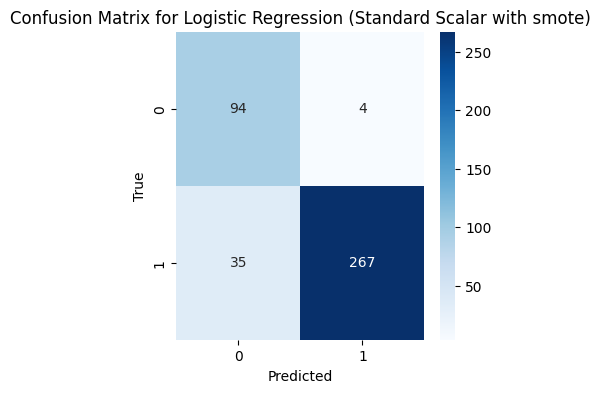


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        98
           1       0.99      0.88      0.93       302

    accuracy                           0.90       400
   macro avg       0.86      0.92      0.88       400
weighted avg       0.92      0.90      0.91       400



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_lr_scaled_smote)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression (Standard Scalar with smote)')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_lr_scaled_smote))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier()
rfr.fit(X_train_smote_scaled, y_train_scalar_smote)

y_pred_train_rf_scaled_smote = rfr.predict(X_train_smote_scaled)
y_pred_test_rf_scaled_smote = rfr.predict(X_test_smote_scaled)

In [ ]:
print("Train Data for Random Forest Classifier")
print('accuracy: {:.2f}'.format(accuracy_score(y_train_scalar_smote, y_pred_train_rf_scaled_smote)))
print('precision: {:.2f}'.format(precision_score(y_train_scalar_smote, y_pred_train_rf_scaled_smote)))
print('recall: {:.2f}'.format(recall_score(y_train_scalar_smote, y_pred_train_rf_scaled_smote)))
print('f1_score: {:.2f}'.format(f1_score(y_train_scalar_smote, y_pred_train_rf_scaled_smote)))

print('------------------------')                                 #y_train_scalar_smote

print("Test Data Random Forest Classifier")
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_test_rf_scaled_smote)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred_test_rf_scaled_smote)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred_test_rf_scaled_smote)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred_test_rf_scaled_smote)))

Train Data for Random Forest Classifier
accuracy: 1.00
precision: 1.00
recall: 1.00
f1_score: 1.00
------------------------
Test Data Random Forest Classifier
accuracy: 1.00
precision: 1.00
recall: 1.00
f1_score: 1.00


Confusion Matrix:
[[ 98   0]
 [  1 301]]


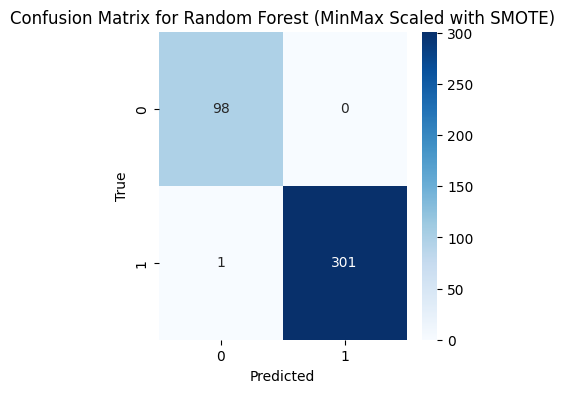


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      1.00      1.00       302

    accuracy                           1.00       400
   macro avg       0.99      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_rf_scaled_smote)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest (MinMax Scaled with SMOTE)')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_rf_scaled_smote))

### xgBoosting

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
xgb_model.fit(X_train_smote_scaled, y_train_scalar_smote)

y_pred_train_xg_scaled_smote = xgb_model.predict(X_train_smote_scaled)
y_pred_test_xg_scaled_smote = xgb_model.predict(X_test_smote_scaled)

In [ ]:
print("Train Data")
print('accuracy: {:.2f}'.format(accuracy_score(y_train_scalar_smote, y_pred_train_xg_scaled_smote)))
print('precision: {:.2f}'.format(precision_score(y_train_scalar_smote, y_pred_train_xg_scaled_smote)))
print('recall: {:.2f}'.format(recall_score(y_train_scalar_smote, y_pred_train_xg_scaled_smote)))
print('f1_score: {:.2f}'.format(f1_score(y_train_scalar_smote, y_pred_train_xg_scaled_smote)))


print('-----------------------------------------------------------------------')

print("Test Data")
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_test_xg_scaled_smote)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred_test_xg_scaled_smote)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred_test_xg_scaled_smote)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred_test_xg_scaled_smote)))



Train Data
accuracy: 1.00
precision: 1.00
recall: 1.00
f1_score: 1.00
-----------------------------------------------------------------------
Test Data
accuracy: 1.00
precision: 1.00
recall: 1.00
f1_score: 1.00


Confusion Matrix:
[[ 98   0]
 [  1 301]]


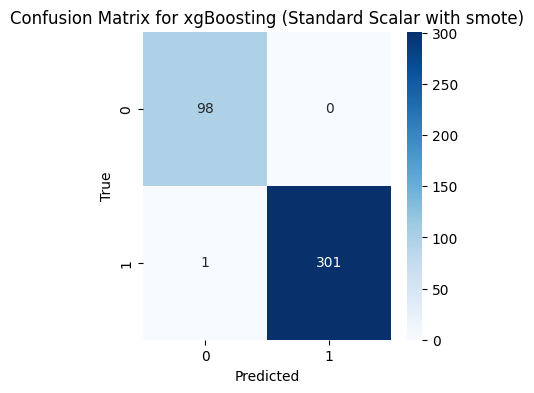


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      1.00      1.00       302

    accuracy                           1.00       400
   macro avg       0.99      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test_rf_scaled_smote)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for xgBoosting (Standard Scalar with smote)')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_rf_scaled_smote))

# 2) Transaction_Data

In [ ]:
#transaction_data.to_csv('transaction_data.csv', index=False)

In [ ]:
transaction_data = pd.read_csv('transaction_data.csv')

## Feature Engineering

In [ ]:
transaction_data.head(1)

customer_id                        transaction_id  transaction_amount  \
0        C243  8b16b4bd-1101-4c4f-a75d-2a2e436710be              872.53   

  transaction_type transaction_date  transaction_year  transaction_month  \
0       withdrawal       2024-08-13              2024                  8   

  transaction_month_name  transaction_day transaction_day_name  \
0                 August               13              Tuesday   

   transaction_type_encoded  Transaction_Count_x  Avg_Transaction_Amount_x  \
0                         4                    7                   3141.92   

   Transaction_Count_y  Avg_Transaction_Amount_y  Transaction_Count  \
0                    2                  2482.405                  7   

   Avg_Transaction_Amount  
0                 3141.92

In [ ]:
transaction_data['transaction_date'] = pd.to_datetime(transaction_data['transaction_date'])


transaction_data['transaction_year'] = transaction_data['transaction_date'].dt.year
transaction_data['transaction_month'] = transaction_data['transaction_date'].dt.month
transaction_data['transaction_month_name'] = transaction_data['transaction_date'].dt.month_name()
transaction_data['transaction_day'] = transaction_data['transaction_date'].dt.day
transaction_data['transaction_day_name'] = transaction_data['transaction_date'].dt.day_name()
transaction_data['transaction_hour'] = transaction_data['transaction_date'].dt.hour

transaction_data.head(1)

customer_id                        transaction_id  transaction_amount  \
0        C243  8b16b4bd-1101-4c4f-a75d-2a2e436710be              872.53   

  transaction_type transaction_date  transaction_year  transaction_month  \
0       withdrawal       2024-08-13              2024                  8   

  transaction_month_name  transaction_day transaction_day_name  \
0                 August               13              Tuesday   

   transaction_type_encoded  Transaction_Count_x  Avg_Transaction_Amount_x  \
0                         4                    7                   3141.92   

   Transaction_Count_y  Avg_Transaction_Amount_y  Transaction_Count  \
0                    2                  2482.405                  7   

   Avg_Transaction_Amount  transaction_hour  
0                 3141.92                 0

In [ ]:
#transaction_data = transaction_data.drop(columns=['month_name'])

## Feature Scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

transaction_data['transaction_type_encoded'] = label_encoder.fit_transform(transaction_data['transaction_type'])
transaction_data.head()

transaction_data[['transaction_type','transaction_type_encoded']].value_counts().sort_index()

transaction_type    transaction_type_encoded
Cash Transaction    0                           1288
Credit Transaction  1                           1190
Purchases           2                           1154
deposit             3                           1211
withdrawal          4                           1157
Name: count, dtype: int64

In [ ]:
transaction_data.transaction_type.unique()

array(['withdrawal', 'Credit Transaction', 'deposit', 'Purchases',
       'Cash Transaction'], dtype=object)

In [ ]:
transaction_data.nunique()

customer_id                  999
transaction_id              6000
transaction_amount          5965
transaction_type               5
transaction_date             366
transaction_year               2
transaction_month             12
transaction_month_name        12
transaction_day               31
transaction_day_name           7
transaction_type_encoded       5
Transaction_Count_x           15
Avg_Transaction_Amount_x     999
Transaction_Count_y            6
Avg_Transaction_Amount_y    3505
Transaction_Count             15
Avg_Transaction_Amount       999
dtype: int64

In [ ]:
transaction_data['transaction_year'].unique()

array([2024, 2023])

In [ ]:
transaction_data['Transaction_Count'] = transaction_data.groupby('customer_id')['transaction_id'].transform('count')
transaction_data.head(1)

customer_id                        transaction_id  transaction_amount  \
0        C243  8b16b4bd-1101-4c4f-a75d-2a2e436710be              872.53   

  transaction_type transaction_date  transaction_year  transaction_month  \
0       withdrawal       2024-08-13              2024                  8   

  transaction_month_name  transaction_day transaction_day_name  \
0                 August               13              Tuesday   

   transaction_type_encoded  Transaction_Count_x  Avg_Transaction_Amount_x  \
0                         4                    7                   3141.92   

   Transaction_Count_y  Avg_Transaction_Amount_y  Transaction_Count  \
0                    2                  2482.405                  7   

   Avg_Transaction_Amount  
0                 3141.92

In [ ]:
transaction_data['Avg_Transaction_Amount'] = transaction_data.groupby('customer_id')['transaction_amount'].transform('mean')
transaction_data.head(10)

customer_id                        transaction_id  transaction_amount  \
0        C243  8b16b4bd-1101-4c4f-a75d-2a2e436710be              872.53   
1        C831  a620a8ff-4cf8-439a-9f1c-3cb4f7b7c68c             4035.22   
2        C539  6b9e2479-aeb3-40cd-926f-1f5f6be92641             2891.08   
3        C803  9fe5dea4-461a-4a08-a35a-f93277eaba7a             3916.09   
4        C827  11859ca5-5beb-4d72-a4de-fb6191033d0b              570.65   
5        C675  ed210909-b6fa-4015-beee-f68255b21af5              605.53   
6        C649  dbe89a4b-a3e6-47c9-bfcb-706d7ab5218a             2262.34   
7        C203  c349ecc6-803f-4a73-8330-aa07191c9b5f             3166.54   
8        C579  ce943005-8203-49f3-a998-f6e81108976f             4475.65   
9        C443  d20babf9-67d2-4d9e-99ab-adc0b314a199             4818.70   

     transaction_type transaction_date  transaction_year  transaction_month  \
0          withdrawal       2024-08-13              2024                  8   
1  Credit Transaction       2024-10-30              2024                 10   
2  Credit Transaction       2024-03-07              2024                  3   
3          withdrawal       2024-05-08              2024                  5   
4          withdrawal       2024-05-27              2024                  5   
5             deposit       2024-07-04              2024                  7   
6          withdrawal       2024-01-07              2024                  1   
7           Purchases       2024-05-29              2024                  5   
8           Purchases       2024-10-10              2024                 10   
9           Purchases       2024-10-02              2024                 10   

  transaction_month_name  transaction_day transaction_day_name  \
0                 August               13              Tuesday   
1                October               30            Wednesday   
2                  March                7             Thursday   
3                    May                8            Wednesday   
4                    May               27               Monday   
5                   July                4             Thursday   
6                January                7               Sunday   
7                    May               29            Wednesday   
8                October               10             Thursday   
9                October                2            Wednesday   

   transaction_type_encoded  Transaction_Count_x  Avg_Transaction_Amount_x  \
0                         4                    7               3141.920000   
1                         1                    3               2362.850000   
2                         1                    9               2590.636667   
3                         4                   11               1828.020909   
4                         4                    5               1425.060000   
5                         3                   10               2047.185000   
6                         4                    7               1823.171429   
7                         2                    7               1415.232857   
8                         2                   11               2494.984545   
9                         2                    9               2362.986667   

   Transaction_Count_y  Avg_Transaction_Amount_y  Transaction_Count  \
0                    2                 2482.4050                  7   
1                    1                 4035.2200                  3   
2                    5                 3098.7300                  9   
3                    1                 3916.0900                 11   
4                    4                 1157.9925                  5   
5                    2                 1230.0300                 10   
6                    1                 2262.3400                  7   
7                    2                 1708.5200                  7   
8                    3                 3778.5200                 11   
9         

In [ ]:
transaction_data.duplicated().sum()

0

In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               6000 non-null   object 
 1   transaction_id            6000 non-null   object 
 2   transaction_amount        6000 non-null   float64
 3   transaction_type          6000 non-null   object 
 4   transaction_date          6000 non-null   object 
 5   transaction_year          6000 non-null   int64  
 6   transaction_month         6000 non-null   int64  
 7   transaction_month_name    6000 non-null   object 
 8   transaction_day           6000 non-null   int64  
 9   transaction_day_name      6000 non-null   object 
 10  transaction_type_encoded  6000 non-null   int64  
 11  Transaction_Count_x       6000 non-null   int64  
 12  Avg_Transaction_Amount_x  6000 non-null   float64
 13  Transaction_Count_y       6000 non-null   int64  
 14  Avg_Tran

In [ ]:
df = transaction_data.copy()

In [ ]:
transaction_data.columns

Index(['customer_id', 'transaction_id', 'transaction_amount',
       'transaction_type', 'transaction_date', 'transaction_year',
       'transaction_month', 'transaction_month_name', 'transaction_day',
       'transaction_day_name', 'transaction_type_encoded',
       'Transaction_Count_x', 'Avg_Transaction_Amount_x',
       'Transaction_Count_y', 'Avg_Transaction_Amount_y', 'Transaction_Count',
       'Avg_Transaction_Amount'],
      dtype='object')

In [ ]:
transaction_data.to_csv('transaction_data.csv', index=False)

### Visualization


## Visualization for Transaction Data

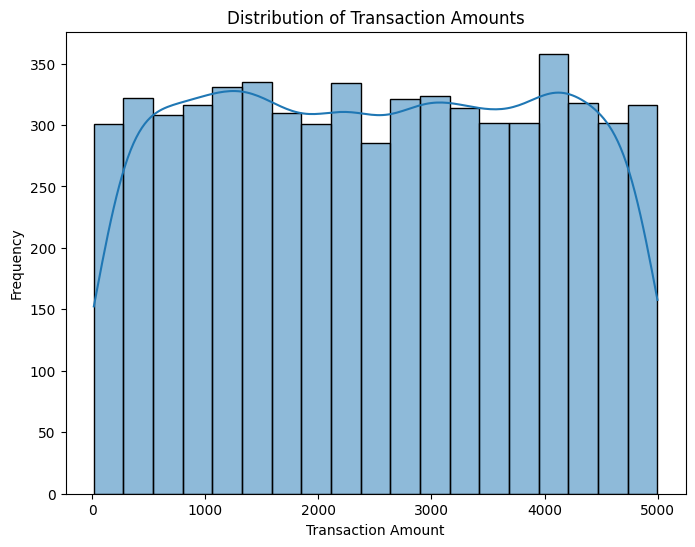

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(8, 6))
sns.histplot(transaction_data['transaction_amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

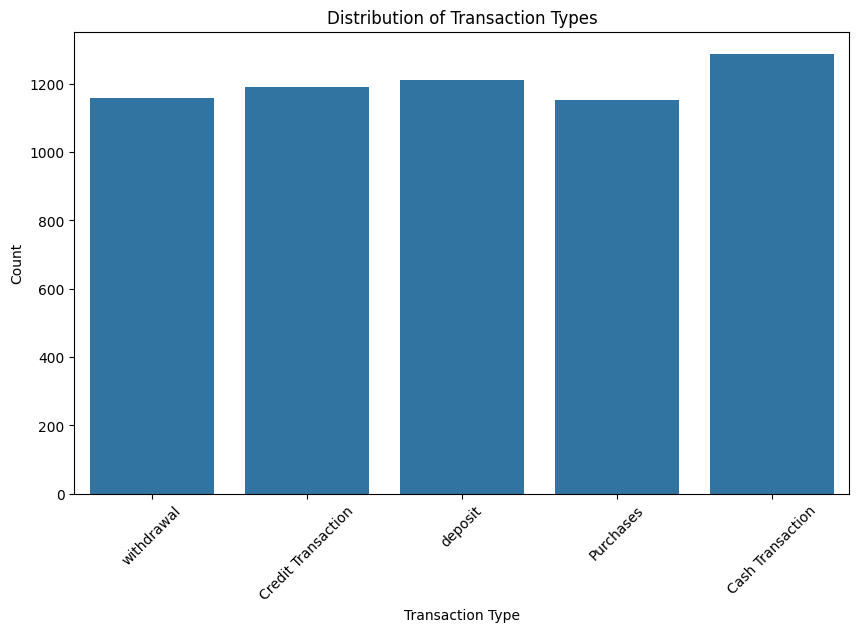

In [ ]:
# Transaction type distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_type', data=transaction_data)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

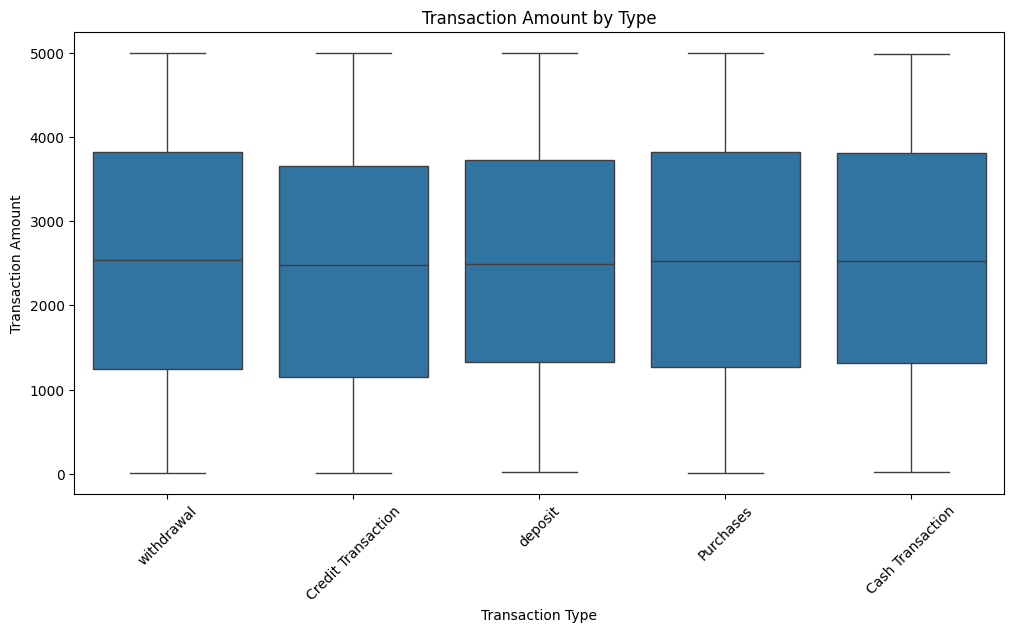

In [ ]:
# Transaction amount by type
plt.figure(figsize=(12, 6))
sns.boxplot(x='transaction_type', y='transaction_amount', data=transaction_data)
plt.title('Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

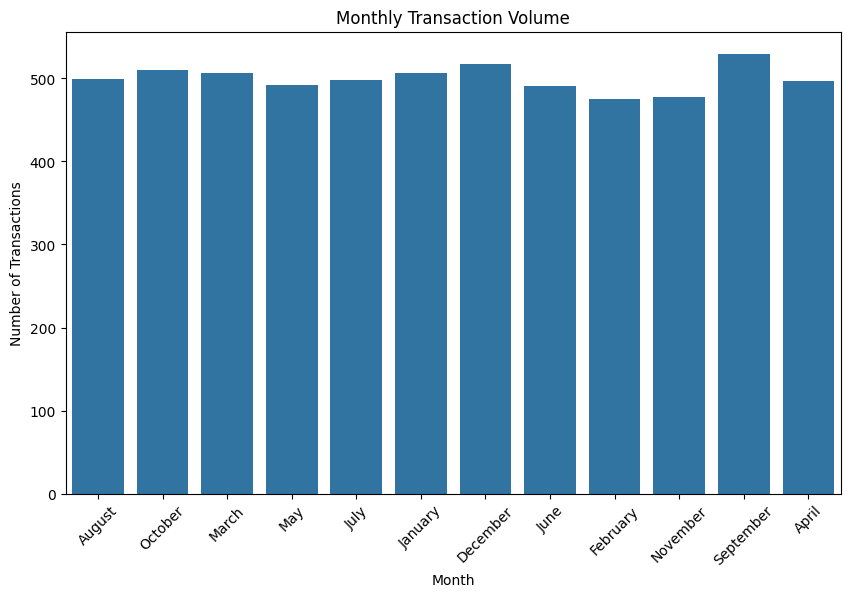

In [ ]:
# Monthly transaction volume
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_month_name', data=transaction_data, order=pd.unique(transaction_data['transaction_month_name']))
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

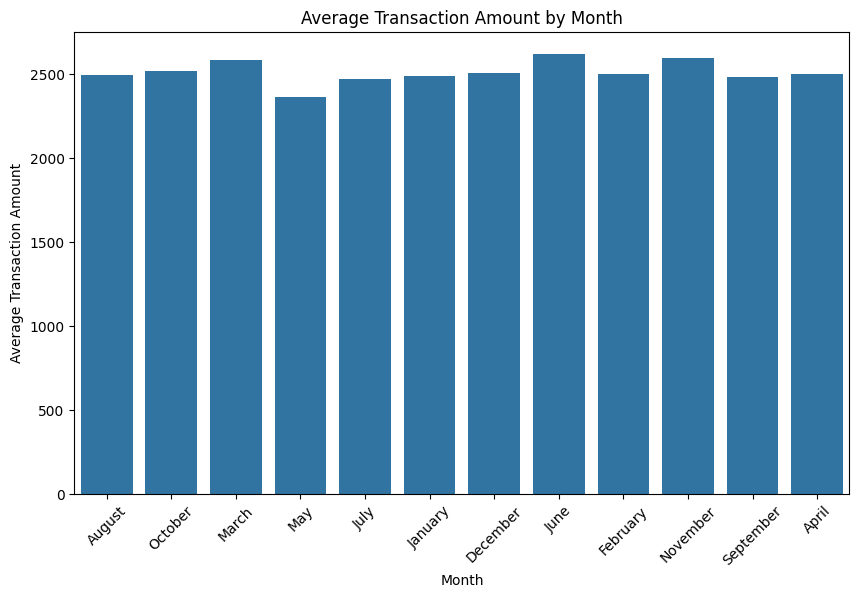

In [ ]:
# Average transaction amount by month
plt.figure(figsize=(10, 6))
sns.barplot(x='transaction_month_name', y='transaction_amount', data=transaction_data, estimator=np.mean, errorbar=None, order=pd.unique(transaction_data['transaction_month_name']))
plt.title('Average Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.show()

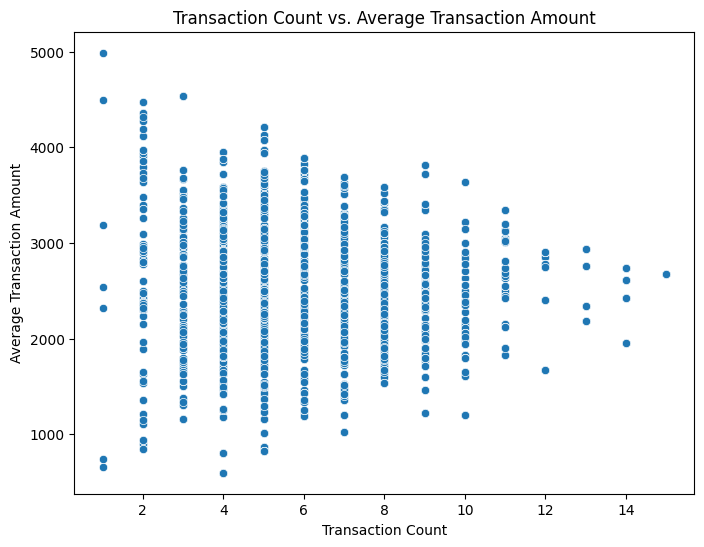

In [ ]:
# Relationship between transaction count and average transaction amount per customer
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Transaction_Count', y='Avg_Transaction_Amount', data=transaction_data)
plt.title('Transaction Count vs. Average Transaction Amount')
plt.xlabel('Transaction Count')
plt.ylabel('Average Transaction Amount')
plt.show()

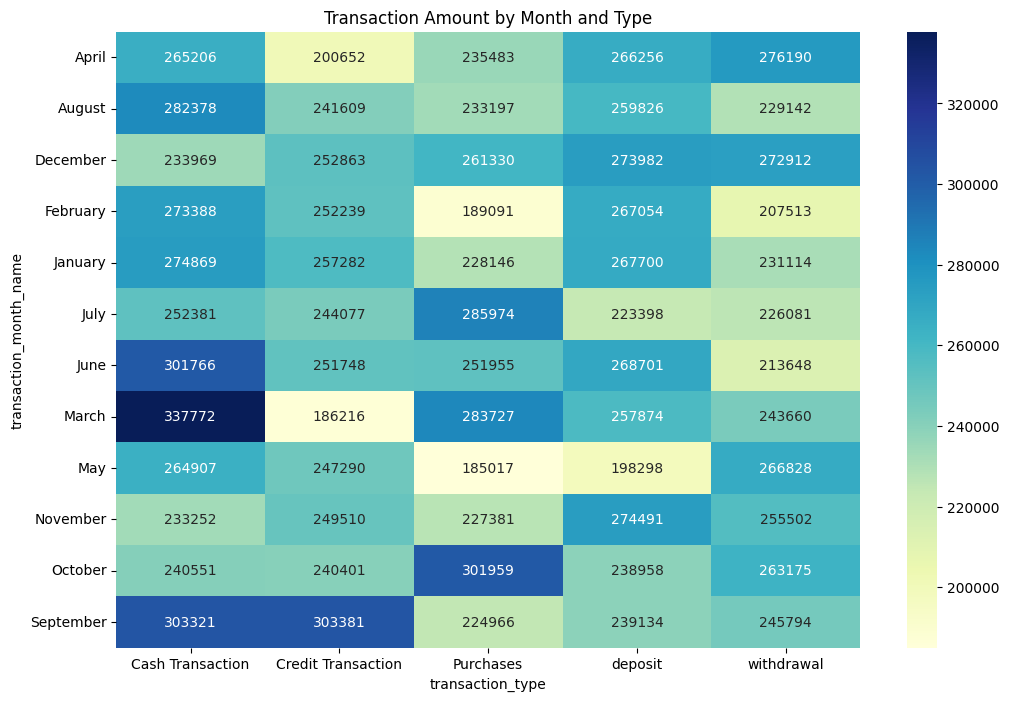

In [ ]:
# Heatmap of transaction amount by month and type
transaction_pivot = transaction_data.pivot_table(index='transaction_month_name', columns='transaction_type', values='transaction_amount', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(transaction_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Transaction Amount by Month and Type')
plt.show()

## K-Means

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = ['Transaction_Count', 'Avg_Transaction_Amount', 'transaction_amount', 'transaction_type_encoded']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[features])

In [ ]:
df[features].head(1)

Transaction_Count  Avg_Transaction_Amount  transaction_amount  \
0                  7                 3141.92              872.53   

   transaction_type_encoded  
0                         4

In [ ]:
X_scaled[0]

array([0.42857143, 0.57936889, 0.17226619, 1.        ])

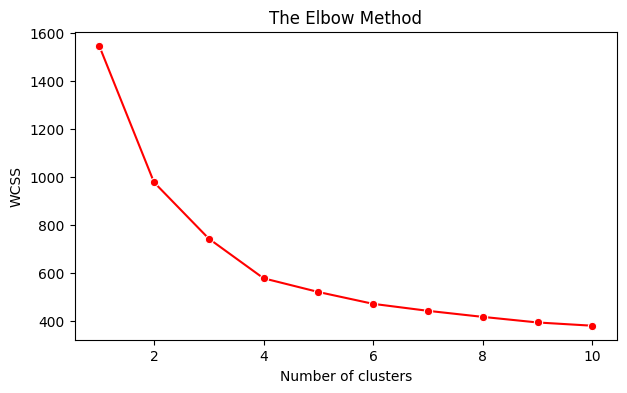

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))

sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
wcss

[1547.4463143243418,
 977.8916651285904,
 742.8646704904697,
 577.3655333633021,
 520.2445024779928,
 470.800167274181,
 441.70829674172245,
 416.43873646731674,
 393.172495009101,
 379.5812745008289]

In [ ]:
from sklearn.metrics import silhouette_score
feature = X_scaled

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(feature, cluster_labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score}')

Silhouette Score for k=2: 0.32328467676792344
Silhouette Score for k=3: 0.3013201007526405
Silhouette Score for k=4: 0.29548572549273355
Silhouette Score for k=5: 0.2730008910701418
Silhouette Score for k=6: 0.25340993840619364
Silhouette Score for k=7: 0.2219984345392495
Silhouette Score for k=8: 0.23507159796345184
Silhouette Score for k=9: 0.22071418245369734
Silhouette Score for k=10: 0.21282791729536127


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

cluster_labels = kmeans.fit_predict(X_scaled)
df['cluster'] = cluster_labels

silhouette_avg = silhouette_score(X_scaled, df['cluster'])
dbi = davies_bouldin_score(X_scaled, df['cluster'])

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {dbi:.2f}")

Silhouette Score: 0.30
Davies-Bouldin Index: 1.16


In [ ]:
cluster_sizes = df['cluster'].value_counts()
cluster_sizes

cluster
0    2478
2    1770
1    1752
Name: count, dtype: int64

In [ ]:
df.head(1)

customer_id                        transaction_id  transaction_amount  \
0        C243  8b16b4bd-1101-4c4f-a75d-2a2e436710be              872.53   

  transaction_type transaction_date  transaction_year  transaction_month  \
0       withdrawal       2024-08-13              2024                  8   

  transaction_month_name  transaction_day transaction_day_name  \
0                 August               13              Tuesday   

   transaction_type_encoded  Transaction_Count_x  Avg_Transaction_Amount_x  \
0                         4                    7                   3141.92   

   Transaction_Count_y  Avg_Transaction_Amount_y  Transaction_Count  \
0                    2                  2482.405                  7   

   Avg_Transaction_Amount  cluster  
0                 3141.92        2

In [ ]:
features = ['Transaction_Count', 'Avg_Transaction_Amount', 'transaction_amount', 'transaction_type_encoded']

In [ ]:
cluster_summary = df.groupby('cluster').agg({
    'Transaction_Count': ['mean', 'std'],
    'transaction_amount': ['mean', 'std'],
    'Avg_Transaction_Amount': ['mean', 'std'],
    'transaction_type_encoded': 'mean',

})

cluster_summary

Transaction_Count           transaction_amount               \
                     mean       std               mean          std   
cluster                                                               
0                6.988297  2.413682        2498.397030  1445.481656   
1                6.881279  2.432798        3765.568014   713.474834   
2                6.985876  2.385495        1287.108582   730.523954   

        Avg_Transaction_Amount             transaction_type_encoded  
                          mean         std                     mean  
cluster                                                              
0                  2513.799927  595.560351                 0.480226  
1                  2735.804074  554.502700                 2.999429  
2                  2284.836290  537.831151                 3.002260

In [ ]:
df_grouped = df.groupby(['cluster', 'transaction_type'])['transaction_id'].count()

most_frequent_transactions = df_grouped.groupby('cluster').idxmax()

print("Most Frequent Transaction Type per Cluster:")
for cluster, transaction_type in most_frequent_transactions:
    print(f"Cluster {cluster} is dominated by {transaction_type} transactions.")

Most Frequent Transaction Type per Cluster:
Cluster 0 is dominated by Cash Transaction transactions.
Cluster 1 is dominated by deposit transactions.
Cluster 2 is dominated by deposit transactions.


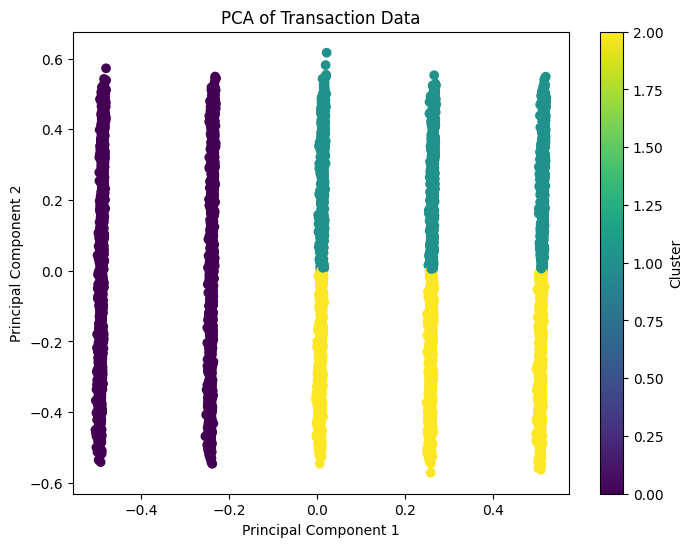

Explained Variance Ratio: [0.49170769 0.33740577]
Total Explained Variance: 0.8291134599784505


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis') # Color by cluster
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Transaction Data")
plt.colorbar(label='Cluster')
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Total Explained Variance: {sum(explained_variance_ratio)}")

## Hierarchical Clustering

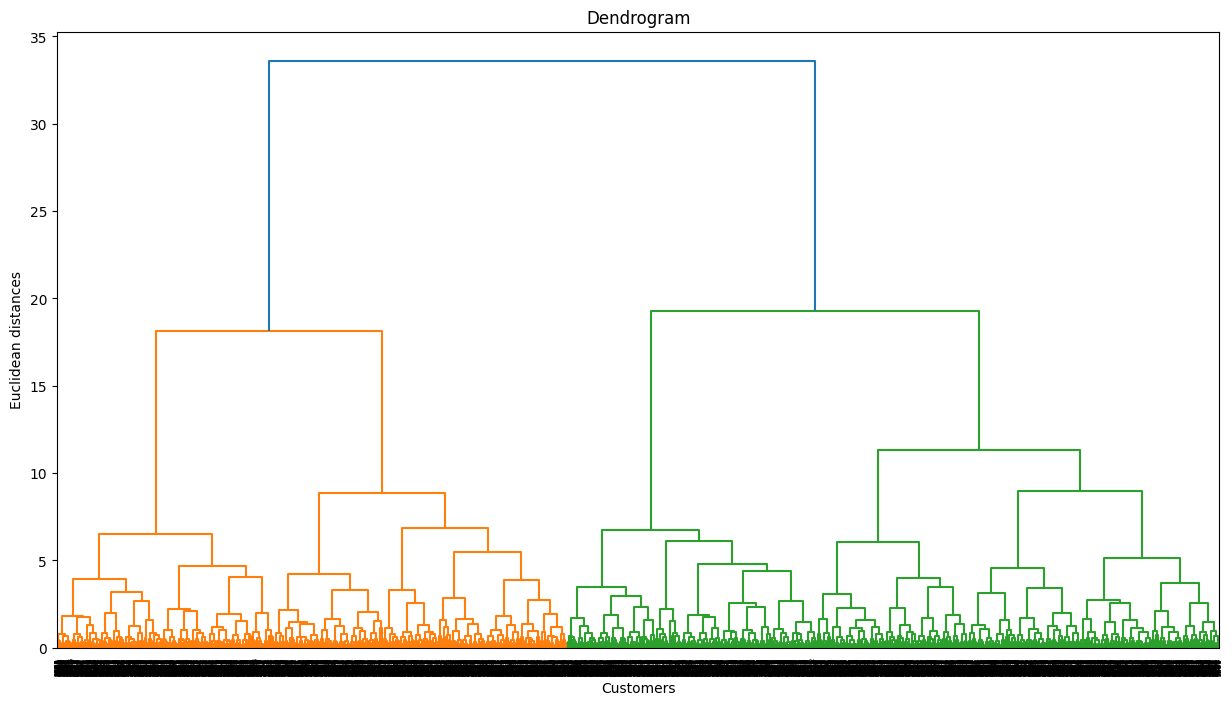

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



In [ ]:
from sklearn.cluster import AgglomerativeClustering
for k in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    df['cluster_hc'] = hc.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X_scaled, df['cluster_hc'])
    dbi = davies_bouldin_score(X_scaled, df['cluster_hc'])


    print(f"Silhouette Score for k={k}: {silhouette_avg:.2f}")
    print(f"Davies-Bouldin Index for k={k}: {dbi:.2f}")
    print('-------------------------------------------------------------------------')

Silhouette Score for k=2: 0.32
Davies-Bouldin Index for k=2: 1.25
-------------------------------------------------------------------------
Silhouette Score for k=3: 0.27
Davies-Bouldin Index for k=3: 1.25
-------------------------------------------------------------------------
Silhouette Score for k=4: 0.25
Davies-Bouldin Index for k=4: 1.23
-------------------------------------------------------------------------
Silhouette Score for k=5: 0.23
Davies-Bouldin Index for k=5: 1.33
-------------------------------------------------------------------------
Silhouette Score for k=6: 0.21
Davies-Bouldin Index for k=6: 1.36
-------------------------------------------------------------------------
Silhouette Score for k=7: 0.19
Davies-Bouldin Index for k=7: 1.45
-------------------------------------------------------------------------
Silhouette Score for k=8: 0.19
Davies-Bouldin Index for k=8: 1.38
-------------------------------------------------------------------------
Silhouette Score for

In [ ]:
optimal_k = 3

hc = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['cluster_hc'] = hc.fit_predict(X_scaled)

silhouette_avg_hc = silhouette_score(X_scaled, df['cluster_hc'])
dbi_hc = davies_bouldin_score(X_scaled, df['cluster_hc'])


print(f"Silhouette Score (Hierarchical): {silhouette_avg_hc:.2f}")
print(f"Davies-Bouldin Index (Hierarchical): {dbi_hc:.2f}")

Silhouette Score (Hierarchical): 0.27
Davies-Bouldin Index (Hierarchical): 1.25


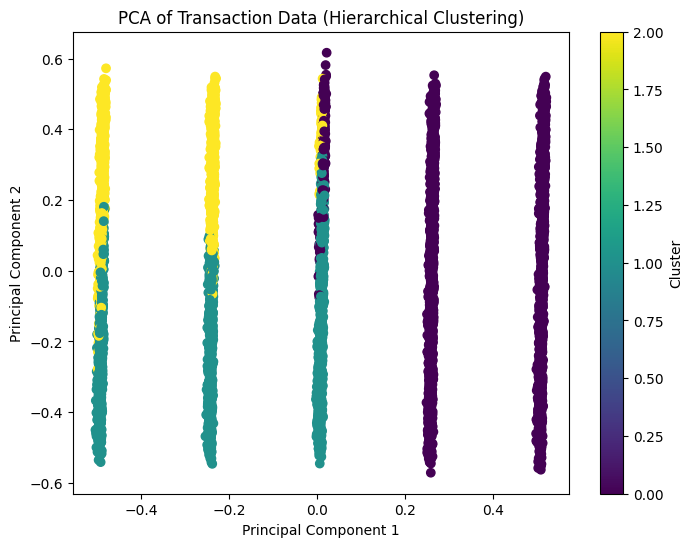

In [ ]:
# Visualize the results with PCA (similar to K-Means)
pca = PCA(n_components=2)
X_pca_hc = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_hc[:, 0], X_pca_hc[:, 1], c=df['cluster_hc'], cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Transaction Data (Hierarchical Clustering)")
plt.colorbar(label='Cluster')
plt.show()

# 3) Recommendation System

In [ ]:
# recommendation_data.to_csv('recommendation_data.csv', index=False)

df = pd.read_csv('recommendation_data.csv')


In [ ]:
df = recommendation_data.copy()

In [ ]:
df.head(1)

customer_id                            product_id interaction_type  \
0         C19  2fcc96d3-4846-4f86-b6f0-75e06e0590ef           viewed   

  interaction_date interaction_details  
0       2024-11-11        Loan Balance

## Collaborative Filtering

In [ ]:
df

customer_id                            product_id interaction_type  \
0            C19  2fcc96d3-4846-4f86-b6f0-75e06e0590ef           viewed   
1           C819  f3a2c7df-f3ef-4658-b6df-7a5813d9a200        purchased   
2           C411  6051a735-38bf-404a-abd7-1f670d187747           viewed   
3           C106  732272e5-0094-4717-815c-46e1cf3703b4        purchased   
4            C10  ea146897-a1a3-4529-a924-b28ccb9e9f6a           viewed   
...          ...                                   ...              ...   
9995        C161  ff21feb2-48f4-4c6c-a9ea-e2ee24db78d7           viewed   
9996        C472  5835594a-39ce-42ea-9875-6c2a1a3744d4        purchased   
9997        C577  569d9ff7-cd58-4b96-8367-68f321a3a537           viewed   
9998        C289  d63556fa-d63a-4660-9009-2c2a17ce469a        purchased   
9999        C143  ccc36253-5342-4d40-afd8-0286b0a39987           viewed   

     interaction_date    interaction_details  
0          2024-11-11           Loan Balance  
1          2024-01-07       Health Insurance  
2          2024-05-02         Policy Details  
3          2024-02-18         Life Insurance  
4          2024-07-25         Exchange Rates  
...               ...                    ...  
9995       2024-06-26              Portfolio  
9996       2024-01-04      Recurring Deposit  
9997       2024-03-17         Exchange Rates  
9998       2024-12-17           Mutual Funds  
9999       2024-10-12  Fixed Deposit Details  

[10000 rows x 5 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item interaction matrix
user_item_matrix = pd.pivot_table(df, index='customer_id', columns='interaction_details', values='interaction_type', aggfunc='count', fill_value=0)

# Calculate cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)


def recommend_items(user_id, user_similarity_matrix, user_item_matrix, top_n=5):
    # Finding the similarity scores of the user with other users
    user_index = user_item_matrix.index.get_loc(user_id)
    similarity_scores = user_similarity_matrix[user_index]

    # Sort the users by similarity score in descending order
    sorted_indices = np.argsort(similarity_scores)[::-1]

    # Exclude the user itself
    sorted_indices = sorted_indices[1:]

    recommendations = []
    for similar_user_index in sorted_indices:
        similar_user_id = user_item_matrix.index[similar_user_index]
        items_interacted = user_item_matrix.loc[similar_user_id][user_item_matrix.loc[similar_user_id] > 0].index.tolist()
        for item in items_interacted:
            if user_item_matrix.loc[user_id, item] == 0:
                recommendations.append(item)
        if len(recommendations) >= top_n:
            break

    return recommendations[:top_n]



In [ ]:
recommendations = recommend_items("C1", user_similarity, user_item_matrix)
recommendations

['Balance', 'EMI Schedule', 'Renew Policy', 'Spending Analysis', 'Forex Card']

In [ ]:
for user_id in user_item_matrix.index:
    recommendations = recommend_items(user_id, user_similarity, user_item_matrix)
    print(f"Recommendations for user {user_id}: {recommendations}")

Recommendations for user C1: ['Balance', 'EMI Schedule', 'Renew Policy', 'Spending Analysis', 'Forex Card']
Recommendations for user C10: ['Balance', 'Set Goals', 'Balance', 'Credit Card', 'EMI Schedule']
Recommendations for user C100: ['Apply for a Loan', 'Policy Details', 'Portfolio', 'Balance', 'Fixed Deposit Details']
Recommendations for user C1000: ['EMI Calculator', 'Fixed Deposit', 'Health Insurance', 'Life Insurance', 'Loan Balance']
Recommendations for user C101: ['Forex Card', 'Personal Loan', 'Life Insurance', 'Loan Balance', 'Bill Payment History']
Recommendations for user C102: ['Mutual Funds', 'Account Details', 'Loan Balance', 'Mutual Funds', 'Pay Bills']
Recommendations for user C103: ['Personal Loan', 'Balance', 'Health Insurance', 'Pay Bills', 'Policy Details']
Recommendations for user C104: ['Open Fixed Deposit', 'Savings Account', 'Apply for a Loan', 'Health Insurance', 'Account Details']
Recommendations for user C105: ['Mutual Funds', 'Open Fixed Deposit', 'Policy 

In [ ]:
from collections import Counter

all_recommendations = []
for user_id in user_item_matrix.index:
    recommendations = recommend_items(user_id, user_similarity, user_item_matrix)
    all_recommendations.extend(recommendations)

# Counting the frequency of each recommendation
recommendation_counts = Counter(all_recommendations)

# Get the most frequent recommendation
most_frequent_recommendation = recommendation_counts.most_common(1)

print(f"The most frequent recommendation in collaborative filtering is: {most_frequent_recommendation}")

The most frequent recommendation in collaborative filtering is: [('Account Details', 233)]


In [ ]:
# top 5 most frequent recommendations
top_5_recommendations = recommendation_counts.most_common(5)

print(f"The top 5 most frequent recommendations in collaborative filtering are: {top_5_recommendations}")

The top 5 most frequent recommendations in collaborative filtering are: [('Account Details', 233), ('Apply for a Loan', 218), ('Bill Payment History', 216), ('Balance', 215), ('Exchange Rates', 206)]


In [ ]:
# Cumulative Gain (NDCG).
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, ndcg_score

# Assuming 'actual_interactions' is a DataFrame with 'customer_id' and 'interaction_details'
# representing the actual interactions of users with items.
# and 'recommendations' are generated as in the previous code

def calculate_metrics(actual_interactions, recommendations):
    """
    Calculates precision, recall, MAP, and NDCG for a collaborative filtering model.
    """
    all_precisions = []
    all_recalls = []
    all_ndcgs = []


    for user_id in actual_interactions['customer_id'].unique():
        actual = actual_interactions[actual_interactions['customer_id'] == user_id]['interaction_details'].tolist()
        predicted = recommendations.get(user_id, []) # Handle cases where no recommendations are made

        #Precision and recall
        if actual and predicted: # Ensure both actual and predicted have items
            # Check if each predicted item is in actual interactions
            relevant_predictions = [1 if item in actual else 0 for item in predicted]

            precision = precision_score(relevant_predictions, [1]*len(predicted), average='binary', zero_division=0)
            recall = recall_score(relevant_predictions, [1]*len(predicted), average='binary', zero_division=0)

            all_precisions.append(precision)
            all_recalls.append(recall)

            # NDCG Calculation
            # Convert interaction details to numerical relevance scores (e.g., 1 for relevant, 0 for irrelevant)
            actual_relevance = [1 if item in predicted else 0 for item in actual]
            predicted_relevance = [1] * len(predicted)
            if actual_relevance and predicted_relevance:
              try:
                  ndcg = ndcg_score([actual_relevance], [predicted_relevance])
                  all_ndcgs.append(ndcg)
              except ValueError:
                pass

    # Calculate mean average precision (MAP)
    map_score = np.mean(all_precisions) if all_precisions else 0
    mean_recall = np.mean(all_recalls) if all_recalls else 0
    mean_ndcg = np.mean(all_ndcgs) if all_ndcgs else 0

    return {
        "precision": map_score,
        "recall": mean_recall,
        "map": map_score,
        "ndcg": mean_ndcg
    }


recommendations = {}
for user in user_item_matrix.index:
    recommendations[user] = recommend_items(user, user_similarity, user_item_matrix)

metrics = calculate_metrics(df, recommendations)
print("Evalutation Metrics for Collaborative Filtering: ",metrics)

Evalutation Metrics for Collaborative Filtering:  {'precision': 0.0, 'recall': 0.0, 'map': 0.0, 'ndcg': 0.0}


## Content Based Filtering

In [ ]:
# Create a user-item interaction matrix based on interaction details
user_item_matrix_content = pd.pivot_table(df, index='customer_id', columns='interaction_details', values='interaction_type', aggfunc='count', fill_value=0)

# Calculate cosine similarity between items
item_similarity = cosine_similarity(user_item_matrix_content.T)

# Function to recommend items based on content
def recommend_items_content_based(user_id, user_item_matrix, item_similarity_matrix, top_n=5):
    user_interactions = user_item_matrix.loc[user_id]

    # Get items the user has interacted with
    interacted_items = user_interactions[user_interactions > 0].index.tolist()

    # Calculate weighted average of item similarities for all items
    item_scores = {}
    for item in user_item_matrix.columns:
        score = 0
        for interacted_item in interacted_items:
            score += item_similarity_matrix[user_item_matrix.columns.get_loc(item), user_item_matrix.columns.get_loc(interacted_item)] * user_interactions[interacted_item]
        item_scores[item] = score

    # Sort items by score and return top N
    sorted_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = [item for item, score in sorted_items if item not in interacted_items][:top_n]

    return recommendations



In [ ]:
recommendations_content = recommend_items_content_based("C1", user_item_matrix_content, item_similarity)
recommendations_content

['Personal Loan',
 'Renew Policy',
 'Statement Download',
 'Credit Card',
 'Recurring Deposit']

In [ ]:
for user_id in user_item_matrix.index:
    recommendations = recommend_items_content_based(user_id, user_item_matrix_content, item_similarity)
    print(f"Recommendations for user {user_id}: {recommendations}")

Recommendations for user C1: ['Personal Loan', 'Renew Policy', 'Statement Download', 'Credit Card', 'Recurring Deposit']
Recommendations for user C10: ['Mutual Funds', 'Apply for a Loan', 'Portfolio', 'EMI Calculator', 'Account Details']
Recommendations for user C100: ['EMI Calculator', 'Spending Analysis', 'Mutual Funds', 'Policy Details', 'Portfolio']
Recommendations for user C1000: ['Life Insurance', 'Mutual Funds', 'Transaction History', 'Balance', 'Statement Download']
Recommendations for user C101: ['Life Insurance', 'Personal Loan', 'Fixed Deposit Details', 'EMI Calculator', 'Statement Download']
Recommendations for user C102: ['Life Insurance', 'Account Details', 'Mutual Funds', 'Policy Details', 'Spending Analysis']
Recommendations for user C103: ['Personal Loan', 'Recurring Deposit', 'Exchange Rates', 'Open Fixed Deposit', 'Bill Payment History']
Recommendations for user C104: ['Policy Details', 'Spending Analysis', 'Life Insurance', 'Balance', 'Forex Card']
Recommendations f

In [ ]:
from collections import Counter
recommendations_content = {}

for user_id in user_item_matrix.index:
    recommendations_content[user_id] = recommend_items_content_based(user_id, user_item_matrix_content, item_similarity)

all_recommendations = []
for user_id, recommendations in recommendations_content.items():
    all_recommendations.extend(recommendations)

recommendation_counts = Counter(all_recommendations)

most_frequent_recommendation = recommendation_counts.most_common(1)

if most_frequent_recommendation:
  print(f"The most frequent recommendation in Content Based Filtering is: {most_frequent_recommendation[0][0]} (appeared {most_frequent_recommendation[0][1]} times)")
else:
  print("No recommendations found.")

The most frequent recommendation in Content Based Filtering is: Life Insurance (appeared 604 times)


In [ ]:
from collections import Counter

all_recommendations = []
for user_id, recommendations in recommendations_content.items():
    all_recommendations.extend(recommendations)

# Count the frequency of each recommendation
recommendation_counts = Counter(all_recommendations)

# Get the top 5 most frequent recommendations
top_5_recommendations = recommendation_counts.most_common(5)

print(f"The top 5 most frequent recommendations in Content Based Filtering are: {top_5_recommendations}")

The top 5 most frequent recommendations in Content Based Filtering are: [('Life Insurance', 604), ('Personal Loan', 566), ('Apply for a Loan', 403), ('Open Fixed Deposit', 328), ('Statement Download', 311)]


In [ ]:
# Cumulative Gain (NDCG).
# metrics for this content based filtering

from sklearn.metrics import precision_score, recall_score, ndcg_score
import numpy as np

def calculate_metrics(actual, predicted):
    """
    Calculates precision, recall, MAP, and NDCG for content-based filtering recommendations.

    Args:
        actual: A list of actual items interacted with by the user.
        predicted: A list of predicted items recommended to the user.

    Returns:
        A dictionary containing the calculated metrics.
    """

    # Precision
    precision = precision_score(np.array([1 if item in actual else 0 for item in predicted]), np.ones(len(predicted)), average='binary')


    # Recall
    recall = recall_score(np.array([1 if item in actual else 0 for item in predicted]), np.ones(len(predicted)), average='binary')


    # MAP (Mean Average Precision)
    relevant_items_indices = [i for i, item in enumerate(predicted) if item in actual]
    if len(relevant_items_indices) == 0:
        map_score = 0  # Handle the case where no items are relevant.
    else:
        map_score = np.mean([ (i + 1) / (j + 1) for i,j in enumerate(relevant_items_indices)])


    # NDCG (Normalized Discounted Cumulative Gain)
    relevance = np.array([1 if item in actual else 0 for item in predicted])
    ideal_relevance = np.sort(relevance)[::-1]  # Ideal ranking for comparison
    ndcg = ndcg_score([ideal_relevance], [relevance])

    return {
        "precision": precision,
        "recall": recall,
        "map": map_score,
        "ndcg": ndcg,
    }

actual_interactions = ["Savings Account", "Fixed Deposit", "Personal Loan"]
predicted_recommendations = ["Savings Account", "Home Loan", "Credit Card", "Fixed Deposit"]

metrics = calculate_metrics(actual_interactions, predicted_recommendations)
print("Evalutation Metrics for Content Based Filtering: ",metrics)

Evalutation Metrics for Content Based Filtering:  {'precision': 0.5, 'recall': 1.0, 'map': 0.75, 'ndcg': 0.7853208594776601}
